<a href="https://colab.research.google.com/github/sanjaydasgupta/data-mining-of-website-articles/blob/master/ml-blogs-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To run this file on Colab [click here](https://colab.research.google.com/github/sanjaydasgupta/data-mining-of-website-articles/blob/master/ml-blogs-eda.ipynb)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from wordcloud import WordCloud, STOPWORDS 
import spacy
import re
import matplotlib.pyplot as plt

spacy_instance = spacy.load('en_core_web_sm')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sanjaydasgupta/data-mining-of-website-articles/master/articles.csv')
df.shape

(683, 8)

In [ ]:
df.head(15)

## Remove unpublished records

In [3]:
df2 = df[df['summary'].notnull()].copy()
print(df2.shape)

(487, 8)


## Clean Titles

In [31]:
patterns = [('regress.*', 'regress'), ('classif.*', 'classify'), ('cluster.*', 'cluster'), ('^r | r | r$', ' rrr ')]
patterns = [(re.compile(pair[0], re.IGNORECASE), pair[1]) for pair in patterns]

def clean(title):
  title = ' '.join([tok.lemma_ for tok in spacy_instance(title.lower())])
  for pattern in patterns:
    title = re.sub(pattern[0], pattern[1], title)
  return title

df2['title_clean'] = df2['title'].map(clean)

In [20]:
for r in df2[['title', 'title_clean']].sample(50).values:
  print(r)

['Step by Step Guide for Deploying a Django Application using Heroku for Free'
 'step by step guide for deploy a django application use heroku for free']
['Practicing Machine Learning Techniques in R with MLR Package'
 'practice machine learn technique in rrrr with mlr package']
['A Must-Read Introduction to Sequence Modelling (with use cases)'
 'a must - read introduction to sequence modelling ( with use case )']
['A Comprehensive Tutorial to Learn Data Science with Julia from Scratch'
 'a comprehensive tutorial to learn datum science with julia from scratch']
['12 Winning Tips to Clinch Your First Win in Data Science Competitions'
 '12 win tip to clinch -PRON- first win in data science competition']
['Top 5 Machine Learning GitHub Repositories and Reddit Discussions from March 2019'
 'top 5 machine learning github repository and reddit discussion from march 2019']
['Everything you Should Know about Confusion Matrix for Machine Learning'
 'everything -PRON- should know about confusion

## Words in Titles

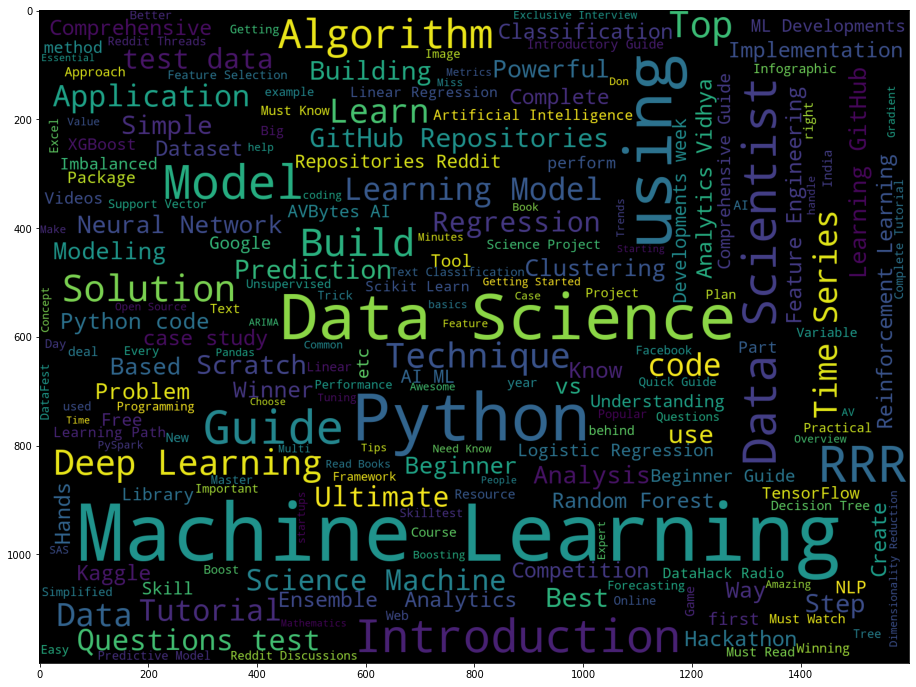

In [45]:
titles = df2['title'].str.cat(sep=' ')
titles = re.sub('^R | R | R$', ' RRR ', titles)
domain_words = """machine learn learning data science scientist using model
 models guide introduction solution""".split()
stopwords = set(list(STOPWORDS) + domain_words)

wordcloud = WordCloud(width=1600, height=1200, 
                background_color='black', 
                stopwords=STOPWORDS, 
                min_font_size = 10).generate(titles) 

fig, ax = plt.subplots(1, 1, figsize = (16, 12)) 
ax.imshow(wordcloud)
None

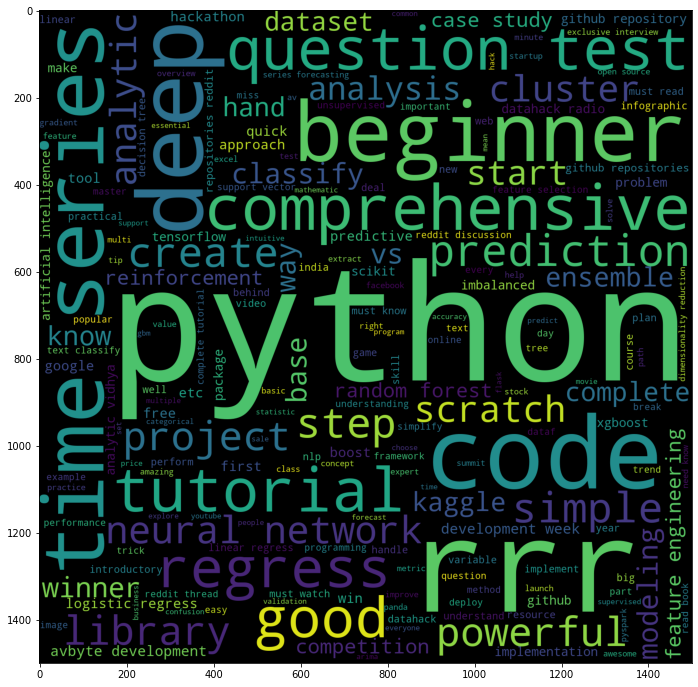

In [34]:
titles = df2['title_clean'].str.cat(sep=' ')
lemmas = ' '.join([tok.lemma_ for tok in spacy_instance(titles)]).lower()
domain_words = """application top machine learning ml ai learn data science introduction algorithm scientist guide
 model build technique solution using use ultimate pron datum""".split()
stopwords = set(list(STOPWORDS) + domain_words)

wordcloud = WordCloud(width = 1500, height = 1500, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(titles) 

fig, ax = plt.subplots(1, 1, figsize = (12, 12)) 
ax.imshow(wordcloud)
None

## Scatter plot using t-SNE

In [ ]:
t = 'regression classification clustered cluster clustering'
' '.join([tok.lemma_ for tok in spacy_instance(t)])

In [ ]:
patterns = [('regression.*', 'regress'), ('classif.*', 'classify'), ('cluster.*', 'cluster')]
patterns = [(re.compile(pair[0], re.IGNORECASE), pair[1]) for pairs in patterns]

In [ ]:
patterns = [('regression.*', 'regress'), ('classif.*', 'classify'), ('cluster.*', 'cluster')]
patterns = [(re.compile(pair[0], re.IGNORECASE), pair[1]) for pair in patterns]

def scatter(data, ng):
  lemmas = data['title'].map(lambda title: ' '.join([tok.lemma_ for tok in spacy_instance(title)]))
  for pattern in patterns:
    lemmas = lemmas.map(lambda s: re.sub(pattern[0], pattern[1], s))
  vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, ng)).fit(lemmas)
  tfidf = vectorizer.transform(data['title'])
  tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
  data['tsne_x'] = tsne_xy[:, 0]
  data['tsne_y'] = tsne_xy[:, 1]
  color_map = {'regression': 'red', 'classification': 'green', 'clustering': 'blue'}
  def color_selector(t):
    if 'regression' in t:
      return 'red'
    elif 'classification' in t:
      return 'green'
    elif 'clustering' in t:
      return 'blue'
    else:
      return 'gray'
  colors = data['title'].str.lower().map(color_selector).values
  ax = data.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True, c=colors)
  ax.set_title('NGram-Range: 1-%d' % ng)

In [ ]:
scatter(df2, 2)

In [ ]:
df2.query("tsne_y < -120")

## Check vocabulary

In [ ]:
print(vectorizer.vocabulary_)
pd.Series(vectorizer.vocabulary_).to_csv('features.csv')

## Remove unpublished records

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2)).fit(df3['title'])
print(len(vectorizer.vocabulary_))
#print(vectorizer.vocabulary_)
tfidf = vectorizer.transform(df3['title'])

In [ ]:
tsne_xy = TSNE(random_state=42).fit_transform(tfidf)
df3['tsne_x'] = tsne_xy[:, 0]
df3['tsne_y'] = tsne_xy[:, 1]

In [ ]:
ax = df3.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True)

In [ ]:
colors = df3['title'].str.lower().map(lambda t: 'red' if 'regression' in t else 'green').values
ax = df3.plot(kind='scatter', x='tsne_x', y='tsne_y', figsize=(9, 9), grid=True, c=colors)

In [ ]:
for t in df_valid[df_valid['title'].str.lower().map(lambda t: 'classification' in t)]['title']:
  print(t)